

# Portfolio Management-Eigen Portfolio

In this case study we use dimensionality reduction techniques for portfolio management and allocation.


## Content

* [1. Problem Definition](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1)    
    * [3.2. Data Visualisation](#2.2)
* [4. Data Preparation](#3)
    * [4.1 Data Cleaning](#3.1)
    * [4.3.Data Transformation](#3.2)  
* [5.Evaluate Algorithms and Models](#4)        
    * [5.1. Train Test Split](#4.1)
    * [5.2. Model Evaluation- Applying Principle Component Analysis](#4.2)
        * [5.2.1. Explained Variance using PCA](#4.2.1)
        * [5.2.2. Looking at Portfolio weights](#4.2.2)
        * [5.2.3. Finding the Best Eigen Portfolio](#4.2.3)
        * [5.2.4. Backtesting Eigenportfolio](#4.2.4)

<a id='0'></a>
# 1. Problem Definition

Our goal in this case study is to maximize risk-adjusted returns using dimensionality
reduction-based algorithm on a dataset of stocks to allocate capital into different asset
classes.

The dataset used for this case study is Dow Jones Industrial Average (DJIA) index and
its respective 30 stocks from year 2000 onwards. The dataset can be downloaded from
yahoo finance.


<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#Import Model Packages 
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from numpy.linalg import inv, eig, svd

from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA

import yahoo_fin.stock_info as si
import yfinance as yf

<a id='1.2'></a>
## 2.2. Loading the Data

In [2]:
# Import the stock information that we need
dow_list = si.tickers_dow()
print(dow_list)

['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS', 'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT']


In [3]:
# load dataset
start_date = '2016-01-03'
end_date = '2019-12-31'

dataset = yf.download(dow_list, start=start_date, end=end_date, adjusted=True)
dataset = dataset['Adj Close']

[*********************100%***********************]  30 of 30 completed


In [4]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
type(dataset)

pandas.core.frame.DataFrame

<a id='2'></a>
# 3. Exploratory Data Analysis

<a id='2.1'></a>
## 3.1. Descriptive Statistics

In [6]:
# shape
dataset.shape

(1005, 30)

In [7]:
# peek at data
set_option('display.width', 100)
dataset.head(5)

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04 00:00:00-05:00,24.151497,130.350830,60.768021,126.005127,56.383396,76.709999,21.344946,66.211899,97.155792,NaN,...,40.549850,49.269157,57.274921,64.666435,93.964348,105.130920,72.352280,33.314346,67.519318,53.333466
2016-01-05 00:00:00-05:00,23.546276,130.210846,59.832993,126.516296,55.794601,77.050003,21.247963,66.778252,95.193420,NaN,...,41.067535,49.493923,58.075592,64.872765,94.391579,105.329498,72.897079,33.771900,65.746994,54.600410
2016-01-06 00:00:00-05:00,23.085485,129.017151,58.171467,124.507416,54.915558,76.290001,21.021667,64.140213,94.683960,NaN,...,40.503479,48.594833,57.246998,64.245644,93.169693,104.255257,71.941299,33.466785,64.738869,55.147106
2016-01-07 00:00:00-05:00,22.111170,125.938278,57.647717,119.287849,53.024780,74.300003,20.536739,61.867298,93.872597,NaN,...,40.148048,46.904594,55.720161,63.684551,90.948120,101.185997,70.526756,33.282993,65.990875,56.431431
2016-01-08 00:00:00-05:00,22.228088,124.069527,57.458092,116.579399,52.485741,73.230003,20.027565,61.204071,93.636742,NaN,...,39.468113,47.048454,54.807777,62.686119,90.563606,99.443741,69.656998,32.959492,65.893326,55.138451


In [8]:
# types
set_option('display.max_rows', 500)
dataset.dtypes

AAPL    float64
AMGN    float64
AXP     float64
BA      float64
CAT     float64
CRM     float64
CSCO    float64
CVX     float64
DIS     float64
DOW     float64
GS      float64
HD      float64
HON     float64
IBM     float64
INTC    float64
JNJ     float64
JPM     float64
KO      float64
MCD     float64
MMM     float64
MRK     float64
MSFT    float64
NKE     float64
PG      float64
TRV     float64
UNH     float64
V       float64
VZ      float64
WBA     float64
WMT     float64
dtype: object

In [9]:
# describe data
set_option('precision', 3)
dataset.describe()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
count,1005.000,1005.000,1005.000,1005.000,1005.000,1005.000,1005.000,1005.000,1005.000,198.000,...,1005.000,1005.000,1005.000,1005.000,1005.000,1005.000,1005.000,1005.000,1005.000,1005.000
mean,38.978,155.024,85.526,253.732,104.715,112.986,33.998,91.603,107.502,42.662,...,54.821,85.013,64.874,81.235,113.903,191.381,115.365,42.091,60.966,80.237
std,11.418,21.860,20.598,99.791,27.212,33.501,9.051,11.648,15.666,3.513,...,10.504,30.347,13.961,14.268,12.914,49.872,35.360,5.349,7.855,17.131
min,20.950,113.486,46.152,98.153,48.625,54.050,18.193,58.857,83.825,34.315,...,37.544,44.161,46.580,61.869,87.223,98.604,64.773,32.460,43.248,52.795
25%,27.431,138.717,69.033,146.007,80.952,81.470,25.901,82.924,95.896,40.385,...,47.053,57.900,52.382,71.306,103.092,147.471,79.477,38.050,55.129,63.808
50%,39.557,153.627,88.635,282.886,113.232,106.980,33.297,93.836,103.749,42.305,...,51.128,81.168,60.919,76.169,113.839,206.252,110.584,40.143,62.806,79.562
75%,46.420,169.615,101.446,343.108,126.579,147.560,41.407,101.787,111.418,46.105,...,63.859,105.473,78.165,84.629,122.525,234.645,140.271,47.526,67.521,92.105
max,71.517,224.061,122.791,430.300,152.728,166.950,52.466,108.488,150.737,49.607,...,79.847,154.974,99.102,117.955,143.342,284.384,186.093,53.938,74.104,116.040


<a id='2.2'></a>
## 3.2. Data Visualization

Taking a look at the correlation. More detailed look at the data will be performed after implementing the Dimensionality Reduction Models.

<AxesSubplot:title={'center':'Correlation Matrix'}>

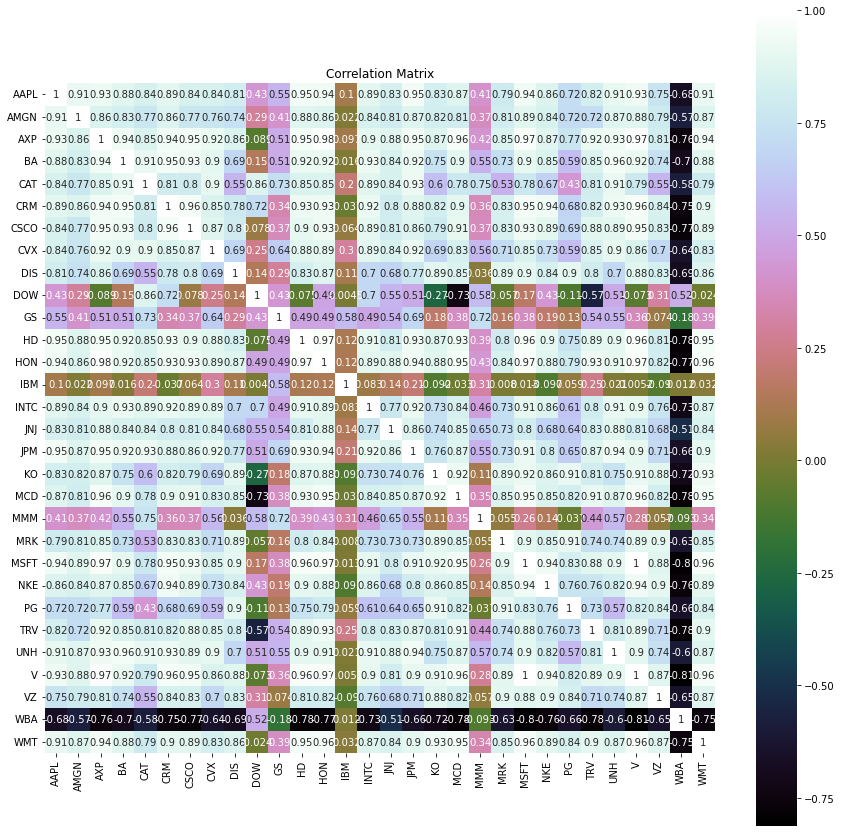

In [10]:
# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

As it can be seen by the chart above, there is a significant positive correlation between
the stocks. 

<a id='3'></a>
## 4. Data Preparation

<a id='3.1'></a>
## 4.1. Data Cleaning
Let us check for the NAs in the rows, either drop them or fill them with the mean of the column

In [11]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = True


Getting rid of the columns with more than 30% missing values. 

In [12]:
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)

missing_fractions.head(10)

drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))

dataset.drop(labels=drop_list, axis=1, inplace=True)
dataset.shape

(1005, 29)

Given that there are null values drop the rown contianing the null values.

In [13]:
# Fill the missing values with the last value available in the dataset. 
dataset=dataset.fillna(method='ffill')

# Drop the rows containing NA
dataset= dataset.dropna(axis=0)
# Fill na with 0
#dataset.fillna('0')

dataset.head(2)

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04 00:00:00-05:00,24.151,130.351,60.768,126.005,56.383,76.71,21.345,66.212,97.156,157.293,...,40.550,49.269,57.275,64.666,93.964,105.131,72.352,33.314,67.519,53.333
2016-01-05 00:00:00-05:00,23.546,130.211,59.833,126.516,55.795,77.05,21.248,66.778,95.193,154.584,...,41.068,49.494,58.076,64.873,94.392,105.329,72.897,33.772,65.747,54.600


Computing Daily Return

In [14]:
# Daily Log Returns (%)
# datareturns = np.log(data / data.shift(1)) 

# Daily Linear Returns (%)
datareturns = dataset.pct_change(1)

#Remove Outliers beyong 3 standard deviation
datareturns= datareturns[datareturns.apply(lambda x :(x-x.mean()).abs()<(3*x.std()) ).all(1)]

<a id='3.2'></a>
## 4.2. Data Transformation

All the variables should be on the same scale before applying PCA, otherwise a feature with large values will dominate the result. Below we use StandardScaler in sklearn to standardize the dataset’s features onto unit scale (mean = 0 and variance = 1).

Standardization is a useful technique to transform attributes to a standard Normal distribution with a mean of
0 and a standard deviation of 1.

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(datareturns)
rescaledDataset = pd.DataFrame(scaler.fit_transform(datareturns),columns = datareturns.columns, index = datareturns.index)
# summarize transformed data
datareturns.dropna(how='any', inplace=True)
rescaledDataset.dropna(how='any', inplace=True)
rescaledDataset.head(2)

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05 00:00:00-05:00,-2.27,-0.210,-1.802,0.180,-0.838,0.212,-0.582,0.728,-2.356,-1.48,...,1.231,0.254,1.071,0.287,0.410,0.045,0.613,1.384,-2.352,2.530
2016-01-08 00:00:00-05:00,0.31,-1.502,-0.483,-1.864,-0.818,-1.206,-2.533,-1.097,-0.381,-0.40,...,-1.929,0.108,-1.462,-2.193,-0.673,-1.778,-1.482,-1.196,-0.196,-2.671


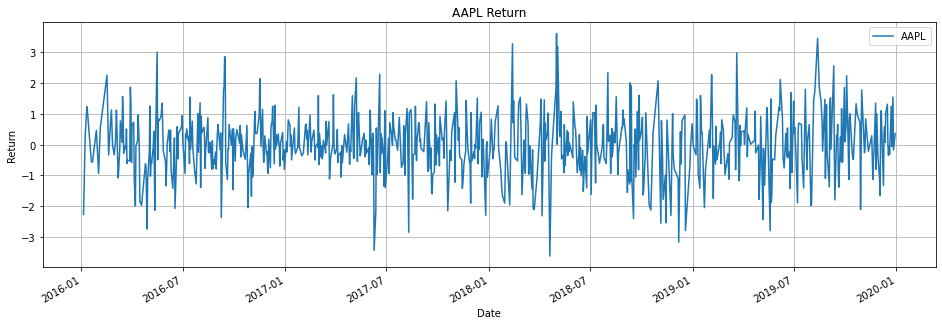

In [16]:
# Visualizing Log Returns for the DJIA 
plt.figure(figsize=(16, 5))
plt.title("AAPL Return")
plt.ylabel("Return")
rescaledDataset.AAPL.plot()
plt.grid(True);
plt.legend()
plt.show()

<a id='4'></a>
# 5. Evaluate Algorithms and Models

<a id='4.1'></a>
## 5.1. Train Test Split

The portfolio is divided into train and test split to perform the analysis regarding the best porfolio and backtesting shown later. 

In [17]:
# Dividing the dataset into training and testing sets
percentage = int(len(rescaledDataset) * 0.8)
X_train = rescaledDataset[:percentage]
X_test = rescaledDataset[percentage:]

X_train_raw = datareturns[:percentage]
X_test_raw = datareturns[percentage:]


stock_tickers = rescaledDataset.columns.values
n_tickers = len(stock_tickers)

<a id='4.2'></a>
## 5.2. Model Evaluation- Applying Principle Component Analysis

As this step, we create a function to compute principle component analysis from sklearn. This function computes an inversed elbow chart that shows the amount of principle components and how many of them explain the variance treshold.

In [18]:
pca = PCA()
PrincipalComponent=pca.fit(X_train)

### First Principal Component /Eigenvector

In [19]:
pca.components_[0]

array([-0.16655499, -0.20149188, -0.21899574, -0.18241227, -0.20944984,
       -0.15777013, -0.22313141, -0.15677936, -0.14669557, -0.20242928,
       -0.18850494, -0.22161964, -0.22359253, -0.21192898, -0.17767444,
       -0.21275598, -0.15079937, -0.13941481, -0.21949997, -0.16904194,
       -0.22400543, -0.14769941, -0.15213869, -0.19724816, -0.18006606,
       -0.21760601, -0.13502792, -0.14745024, -0.12522957])

<a id='4.2.1'></a>
## 5.2.1.Explained Variance using PCA

,Explained Variance
0,32.00%
1,39.87%
2,45.43%
3,49.62%
4,53.47%
5,56.87%
6,60.17%
7,63.25%
8,66.13%
9,68.68%


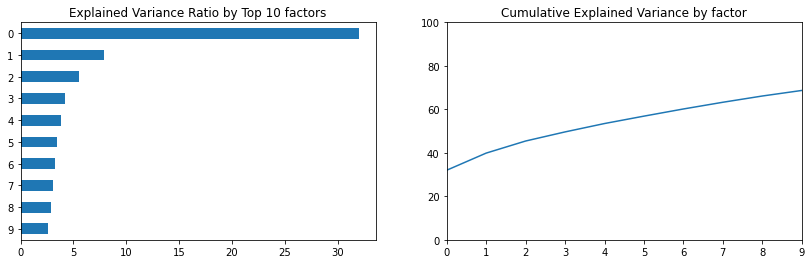

In [20]:
NumEigenvalues=10
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
Series1 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values()*100
Series2 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).cumsum()*100
Series1.plot.barh(ylim=(0,9), label="woohoo",title='Explained Variance Ratio by Top 10 factors',ax=axes[0]);
Series2.plot(ylim=(0,100),xlim=(0,9),ax=axes[1], title='Cumulative Explained Variance by factor');
# explained_variance
pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Explained Variance').head(NumEigenvalues).style.format('{:,.2%}'.format)

We find that the most important factor explains around 40% of the daily return variation. The dominant factor is usually interpreted as ‘the market’, depending on the results of closer inspection.

The plot on the right shows the cumulative explained variance and indicates that around 10 factors explain 73% of the returns of this large cross-section of stocks.  

<a id='4.2.2'></a>
## 5.2.2.Looking at Portfolio weights

We compute several functions to determine the weights of each principle component. We then visualize a scatterplot that visualizes an organized descending plot with the respective weight of every company at the current chosen principle component.

In [21]:
def PCWeights():
    '''
    Principal Components (PC) weights for each 28 PCs
    '''
    weights = pd.DataFrame()

    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])

    weights = weights.values.T
    return weights

weights=PCWeights()

In [22]:
weights[0]

array([0.03138393, 0.03796709, 0.04126534, 0.03437192, 0.0394666 ,
       0.0297286 , 0.04204462, 0.02954191, 0.02764183, 0.03814372,
       0.03551996, 0.04175976, 0.04213151, 0.03993375, 0.03347917,
       0.04008958, 0.0284151 , 0.02626991, 0.04136035, 0.03185255,
       0.04220931, 0.02783098, 0.02866747, 0.03716744, 0.03392982,
       0.04100347, 0.02544329, 0.02778403, 0.02359699])

In [23]:
pca.components_[0]

array([-0.16655499, -0.20149188, -0.21899574, -0.18241227, -0.20944984,
       -0.15777013, -0.22313141, -0.15677936, -0.14669557, -0.20242928,
       -0.18850494, -0.22161964, -0.22359253, -0.21192898, -0.17767444,
       -0.21275598, -0.15079937, -0.13941481, -0.21949997, -0.16904194,
       -0.22400543, -0.14769941, -0.15213869, -0.19724816, -0.18006606,
       -0.21760601, -0.13502792, -0.14745024, -0.12522957])

In [24]:
weights[0]

array([0.03138393, 0.03796709, 0.04126534, 0.03437192, 0.0394666 ,
       0.0297286 , 0.04204462, 0.02954191, 0.02764183, 0.03814372,
       0.03551996, 0.04175976, 0.04213151, 0.03993375, 0.03347917,
       0.04008958, 0.0284151 , 0.02626991, 0.04136035, 0.03185255,
       0.04220931, 0.02783098, 0.02866747, 0.03716744, 0.03392982,
       0.04100347, 0.02544329, 0.02778403, 0.02359699])

array([[<AxesSubplot:title={'center':'Portfolio 0'}>],
       [<AxesSubplot:title={'center':'Portfolio 1'}>],
       [<AxesSubplot:title={'center':'Portfolio 2'}>],
       [<AxesSubplot:title={'center':'Portfolio 3'}>],
       [<AxesSubplot:title={'center':'Portfolio 4'}>]], dtype=object)

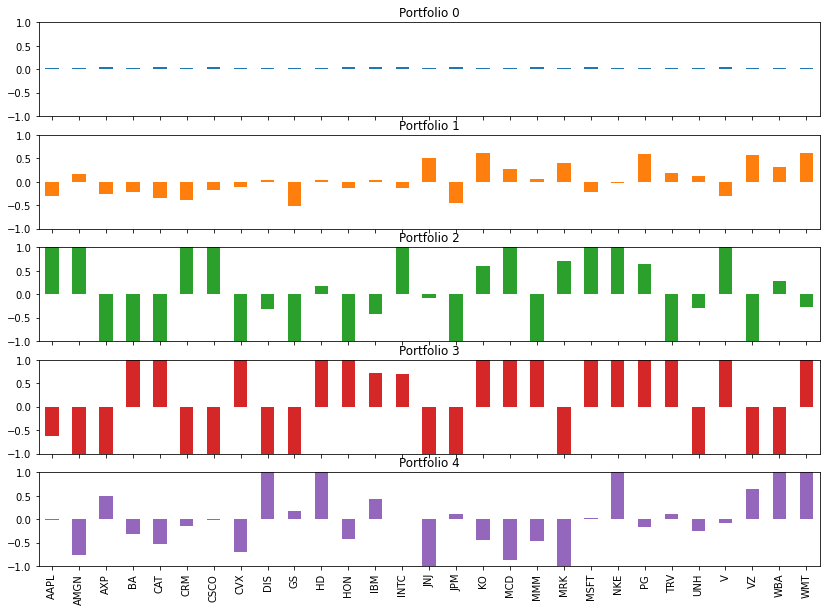

In [25]:
NumComponents=5
        
topPortfolios = pd.DataFrame(pca.components_[:NumComponents], columns=dataset.columns)
eigen_portfolios = topPortfolios.div(topPortfolios.sum(1), axis=0)
eigen_portfolios.index = [f'Portfolio {i}' for i in range( NumComponents)]
np.sqrt(pca.explained_variance_)
eigen_portfolios.T.plot.bar(subplots=True, layout=(int(NumComponents),1), figsize=(14,10), legend=False, sharey=True, ylim= (-1,1))

<AxesSubplot:>

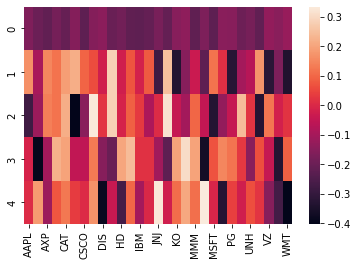

In [26]:
# plotting heatmap 
sns.heatmap(topPortfolios) 

The heatmap and the plot above shown the contribution of different stocks in each
eigenvector.

<a id='4.2.3'></a>
## 5.2.3. Finding the Best Eigen Portfolio

In order to find the best eigen portfolios and perform backtesting in the next step, we use the sharpe ratio, which is a performance
metric that explains the annualized returns against the annualized volatility of each company in a portfolio. A high sharpe ratio explains higher returns and/or lower volatility for the specified portfolio. The annualized sharpe ratio is computed by dividing
the annualized returns against the annualized volatility. For annualized return we
apply the geometric average of all the returns in respect to the periods per year (days
of operations in the exchange in a year). Annualized volatility is computed by taking the standard deviation of the returns and multiplying it by the square root of the peri‐
ods per year.

In [27]:
# Sharpe Ratio
def sharpe_ratio(ts_returns, periods_per_year=252):
    '''
    Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
    It calculares the annualized return, annualized volatility, and annualized sharpe ratio.
    
    ts_returns are  returns of a signle eigen portfolio.
    '''
    n_years = ts_returns.shape[0]/periods_per_year
    annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

We construct a loop to compute the principle component’s weights for each eigen
portfolio, which then uses the sharpe ratio function to look for the portfolio with the
highest sharpe ratio. Once we know which portfolio has the highest sharpe ratio, we
can visualize its performance against the DJIA Index for comparison.

Eigen portfolio #0 with the highest Sharpe. Return 33.88%, vol = 9.04%, Sharpe = 3.75
    Return     Vol  Sharpe
0    0.339   0.090   3.749
19   1.495   0.949   1.575
26   1.238   0.872   1.419
1    0.368   0.344   1.067
16   0.604   0.701   0.861
9    0.215   0.611   0.352
23   0.176   0.588   0.300
7    0.051   0.770   0.066
2    0.086   1.905   0.045
12   0.008   1.899   0.004
6   -1.000  15.380  -0.065
18  -1.000  10.462  -0.096
5   -1.000   7.616  -0.131
27  -1.000   4.642  -0.215
21  -1.000   4.469  -0.224
22  -0.307   1.373  -0.224
15  -1.000   4.437  -0.225
13  -1.000   3.636  -0.275
25  -0.980   3.043  -0.322
20  -0.985   2.652  -0.372


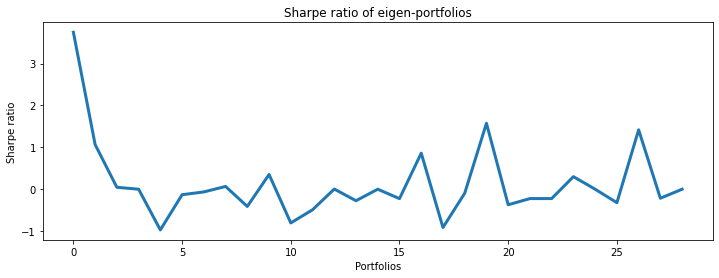

In [28]:
def optimizedPortfolio():
    n_portfolios = len(pca.components_)
    annualized_ret = np.array([0.] * n_portfolios)
    sharpe_metric = np.array([0.] * n_portfolios)
    annualized_vol = np.array([0.] * n_portfolios)
    highest_sharpe = 0 
    stock_tickers = rescaledDataset.columns.values
    n_tickers = len(stock_tickers)
    pcs = pca.components_
    
    for i in range(n_portfolios):
        
        pc_w = pcs[i] / sum(pcs[i])
        eigen_prtfi = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
        eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)
        eigen_prti_returns = np.dot(X_train_raw.loc[:, eigen_prtfi.index], pc_w)
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_train_raw.index)
        er, vol, sharpe = sharpe_ratio(eigen_prti_returns)
        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe
        
        sharpe_metric= np.nan_to_num(sharpe_metric)
        
    # find portfolio with the highest Sharpe ratio
    highest_sharpe = np.argmax(sharpe_metric)

    print('Eigen portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f' % 
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100, 
           annualized_vol[highest_sharpe]*100, 
           sharpe_metric[highest_sharpe]))


    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    ax.plot(sharpe_metric, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

    results = pd.DataFrame(data={'Return': annualized_ret, 'Vol': annualized_vol, 'Sharpe': sharpe_metric})
    results.dropna(inplace=True)
    results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
    print(results.head(20))

    plt.show()

optimizedPortfolio()

As shown from the results above, the portfolio 12 is the best portfolio and has the maximum sharp ratio out of all the porfolio. Let us look at the composition of this portfolio. 

Sum of weights of current eigen-portfolio: 100.00


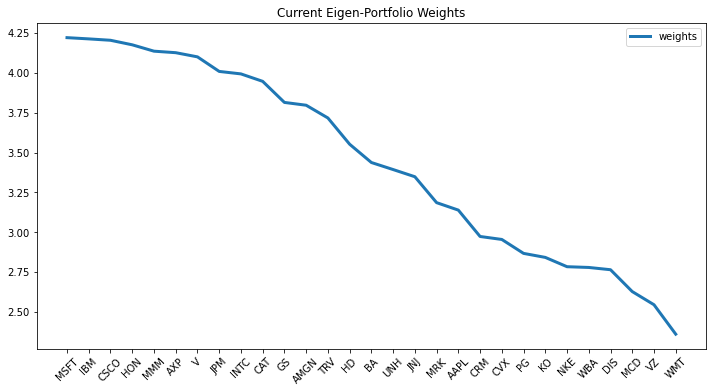

,weights
MSFT,4.221
IBM,4.213
CSCO,4.204
HON,4.176
MMM,4.136
AXP,4.127
V,4.100
JPM,4.009
INTC,3.993
CAT,3.947


In [29]:
weights = PCWeights()
portfolio = portfolio = pd.DataFrame()

def plotEigen(weights, plot=False, portfolio=portfolio):
    portfolio = pd.DataFrame(data ={'weights': weights.squeeze()*100}, index = stock_tickers) 
    portfolio.sort_values(by=['weights'], ascending=False, inplace=True)
    if plot:
        print('Sum of weights of current eigen-portfolio: %.2f' % np.sum(portfolio))
        portfolio.plot(title='Current Eigen-Portfolio Weights', 
            figsize=(12,6), 
            xticks=range(0, len(stock_tickers),1), 
            rot=45, 
            linewidth=3
            )
        plt.show()


    return portfolio

# Weights are stored in arrays, where 0 is the first PC's weights.
plotEigen(weights=weights[0], plot=True)

The chart shows the allocation of the best portfolio. The weights in the chart are in
percentages. 

<a id='4.2.4'></a>
## 5.2.4. Backtesting Eigenportfolio

We will now try to backtest this algorithm on the test set, by looking at few top and bottom portfolios.

Current Eigen-Portfolio:
Return = nan%
Volatility = 762.90%
Sharpe = nan


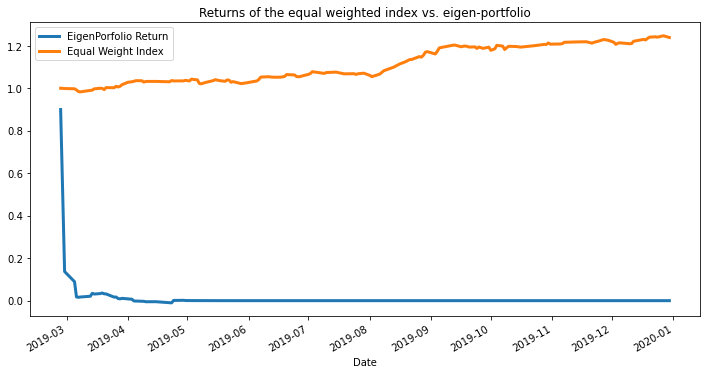

Current Eigen-Portfolio:
Return = -17.13%
Volatility = 34.25%
Sharpe = -0.50


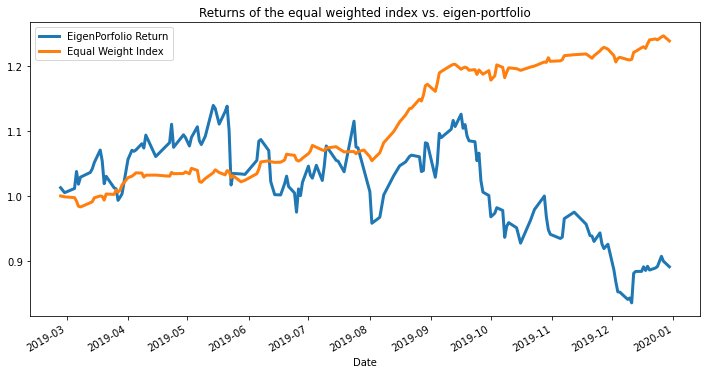

Current Eigen-Portfolio:
Return = -99.93%
Volatility = 484.08%
Sharpe = -0.21


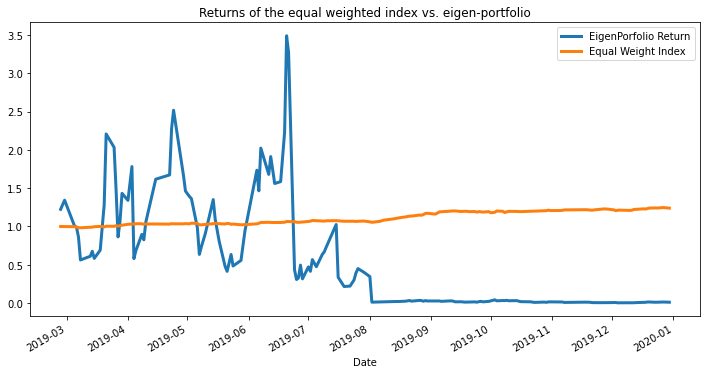

In [30]:
def Backtest(eigen):

    '''

    Plots Principle components returns against real returns.
    
    '''
   
    eigen_prtfi = pd.DataFrame(data ={'weights': eigen.squeeze()}, index = stock_tickers)
    eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)    

    eigen_prti_returns = np.dot(X_test_raw.loc[:, eigen_prtfi.index], eigen)
    eigen_portfolio_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_test_raw.index)
    returns, vol, sharpe = sharpe_ratio(eigen_portfolio_returns)  
    print('Current Eigen-Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (returns*100, vol*100, sharpe))
    equal_weight_return=(X_test_raw * (1/len(pca.components_))).sum(axis=1)    
    df_plot = pd.DataFrame({'EigenPorfolio Return': eigen_portfolio_returns, 'Equal Weight Index': equal_weight_return}, index=X_test.index)
    np.cumprod(df_plot + 1).plot(title='Returns of the equal weighted index vs. eigen-portfolio' , 
                          figsize=(12,6), linewidth=3)
    plt.show()
    
Backtest(eigen=weights[5])
Backtest(eigen=weights[1])
Backtest(eigen=weights[14])

As shown in charts above the eigen portfolio return of the top portfolios outperform
the equally weighted portfolio and the eigen portfolio ranked 19 underperformed the
market significantly in the test set. 

__Conclusion__

In terms of the intuition behind the eigen portfolios, we demonstrated that the first
eigen portfolio represents a systematic risk factor and other eigen portfolio may represent sector or industry factor. We discuss diversification benefits offered by the eigen
portfolios as they are derived using PCA and are independent.


Looking at the backtesting result, the portfolio with the best result in the training set
leads to the best result in the test set. By using PCA, we get independent eigen portfo‐
lios with higher return and sharp ratio as compared to market.
